<a href="https://colab.research.google.com/github/juhii31/calorieBurnt/blob/main/calorieBurnt.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from xgboost import XGBRegressor
from sklearn import metrics

In [ ]:
# loading the data from csv file to a Pandas DataFrame
calories = pd.read_csv('/content/calories.csv')

In [ ]:
calories.head()

,User_ID,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
0,14733363,male,68,190.0,94.0,29.0,105.0,40.8,231.0
1,14861698,female,20,166.0,60.0,14.0,94.0,40.3,66.0
2,11179863,male,69,179.0,79.0,5.0,88.0,38.7,26.0
3,16180408,female,34,179.0,71.0,13.0,100.0,40.5,71.0
4,17771927,female,27,154.0,58.0,10.0,81.0,39.8,35.0


In [ ]:
exercise_data = pd.read_csv('/content/exercise_dataset.csv')

In [ ]:
calories_data = pd.concat([exercise_data, calories['Calories']], axis=1)

In [ ]:
calories_data.head()

,"Activity, Exercise or Sport (1 hour)",130 lb,155 lb,180 lb,205 lb,Calories per kg,Calories
0,"Cycling, mountain bike, bmx",502.0,598.0,695.0,791.0,1.750730,231.0
1,"Cycling, <10 mph, leisure bicycling",236.0,281.0,327.0,372.0,0.823236,66.0
2,"Cycling, >20 mph, racing",944.0,1126.0,1308.0,1489.0,3.294974,26.0
3,"Cycling, 10-11.9 mph, light",354.0,422.0,490.0,558.0,1.234853,71.0
4,"Cycling, 12-13.9 mph, moderate",472.0,563.0,654.0,745.0,1.647825,35.0


In [ ]:
calories_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 7 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Activity, Exercise or Sport (1 hour)  248 non-null    object 
 1   130 lb                                248 non-null    float64
 2   155 lb                                248 non-null    float64
 3   180 lb                                248 non-null    float64
 4   205 lb                                248 non-null    float64
 5   Calories per kg                       248 non-null    float64
 6   Calories                              15000 non-null  float64
dtypes: float64(6), object(1)
memory usage: 820.4+ KB


In [ ]:
calories_data.shape

(15000, 7)

In [ ]:
calories_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 7 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Activity, Exercise or Sport (1 hour)  248 non-null    object 
 1   130 lb                                248 non-null    float64
 2   155 lb                                248 non-null    float64
 3   180 lb                                248 non-null    float64
 4   205 lb                                248 non-null    float64
 5   Calories per kg                       248 non-null    float64
 6   Calories                              15000 non-null  float64
dtypes: float64(6), object(1)
memory usage: 820.4+ KB


In [ ]:
calories_data.describe()

,130 lb,155 lb,180 lb,205 lb,Calories per kg,Calories
count,248.000000,248.000000,248.000000,248.000000,248.000000,15000.000000
mean,389.754032,464.689516,539.685484,614.620968,1.359930,89.539533
std,194.434028,232.019135,269.430029,306.847470,0.678851,62.456978
min,89.000000,106.000000,123.000000,140.000000,0.310067,1.000000
25%,236.000000,281.000000,327.000000,372.000000,0.823236,35.000000
50%,354.000000,422.000000,490.000000,558.000000,1.234853,79.000000
75%,472.000000,563.000000,654.000000,745.000000,1.647825,138.000000
max,1062.000000,1267.000000,1471.000000,1675.000000,3.706591,314.000000


In [ ]:
sns.set()

In [ ]:
print(calories_data.columns)

Index(['Activity, Exercise or Sport (1 hour)', '130 lb', '155 lb', '180 lb',
       '205 lb', 'Calories per kg', 'Calories'],
      dtype='object')


In [ ]:
print(calories_data.head())

  Activity, Exercise or Sport (1 hour)  130 lb  155 lb  180 lb  205 lb  \
0          Cycling, mountain bike, bmx   502.0   598.0   695.0   791.0   
1  Cycling, <10 mph, leisure bicycling   236.0   281.0   327.0   372.0   
2             Cycling, >20 mph, racing   944.0  1126.0  1308.0  1489.0   
3          Cycling, 10-11.9 mph, light   354.0   422.0   490.0   558.0   
4       Cycling, 12-13.9 mph, moderate   472.0   563.0   654.0   745.0   

   Calories per kg  Calories  
0         1.750730     231.0  
1         0.823236      66.0  
2         3.294974      26.0  
3         1.234853      71.0  
4         1.647825      35.0  


In [ ]:
calories_data.columns = calories_data.columns.str.strip()  # Remove leading/trailing spaces

In [ ]:
calories_data.columns = calories_data.columns.str.strip()
print(calories_data.columns) #Print again to be absolutely sure

Index(['Activity, Exercise or Sport (1 hour)', '130 lb', '155 lb', '180 lb',
       '205 lb', 'Calories per kg', 'Calories'],
      dtype='object')


In [ ]:
for col in calories_data.columns:
    print(f"'{col}'") #prints the column name within single quotes.

'Activity, Exercise or Sport (1 hour)'
'130 lb'
'155 lb'
'180 lb'
'205 lb'
'Calories per kg'
'Calories'


Index(['User_ID', 'Gender', 'Age', 'Height', 'Weight', 'Duration',
       'Heart_Rate', 'Body_Temp', 'Calories'],
      dtype='object')


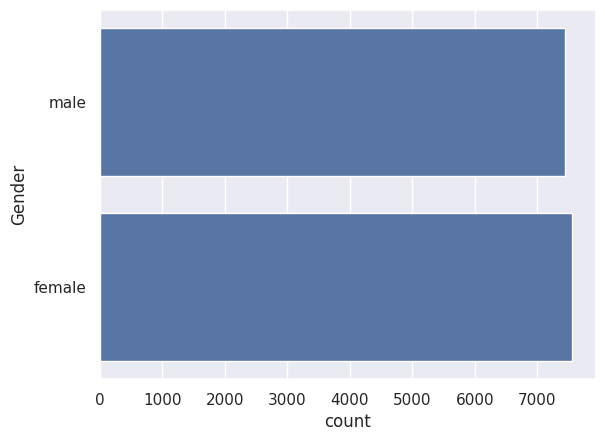

In [ ]:
calories_data = pd.read_csv("calories.csv") #replace with your file name.
print(calories_data.columns)  # No indentation here
sns.countplot(calories_data['Gender'])
plt.show()

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

calories_data = pd.read_csv("calories.csv")

In [ ]:
palette_dict = {'male': 'blue', 'female': 'red'}

<ipython-input-36-aee565bd93fb>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Gender', data=calories_data, palette=palette_dict)


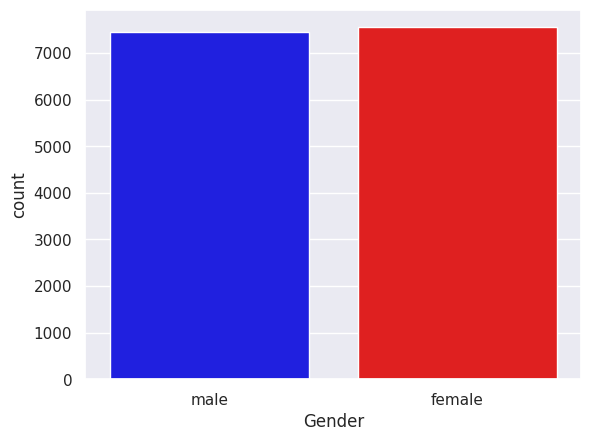

In [ ]:
sns.countplot(x='Gender', data=calories_data, palette=palette_dict)
plt.show()

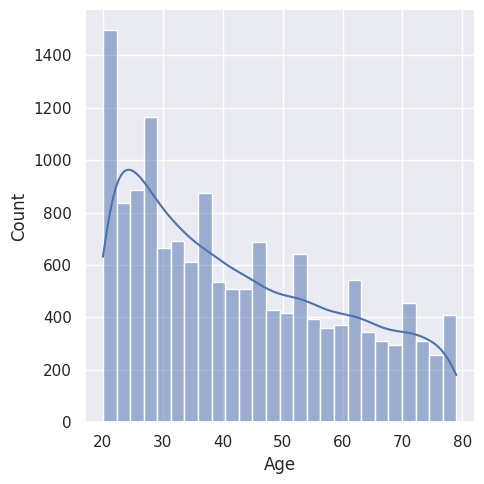

In [ ]:
sns.displot(calories_data['Age'], kde=True)  # kde=True for density curve
plt.show()

<ipython-input-39-6f970bdac006>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(calories_data['Height'])


<Axes: xlabel='Height', ylabel='Density'>

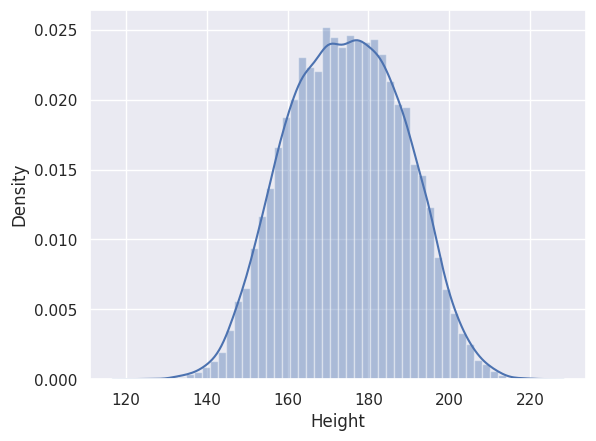

In [ ]:
sns.distplot(calories_data['Height'])

In [ ]:
import pandas as pd

calories_data = pd.read_csv("calories.csv")  # Replace with your file

# Select only numeric columns
numeric_cols = calories_data.select_dtypes(include=['number'])

# Calculate the correlation on the numeric columns
correlation = numeric_cols.corr()

print(correlation)

             User_ID       Age    Height    Weight  Duration  Heart_Rate  \
User_ID     1.000000 -0.001827 -0.013520 -0.011603 -0.002751   -0.000457   
Age        -0.001827  1.000000  0.009554  0.090094  0.013247    0.010482   
Height     -0.013520  0.009554  1.000000  0.958451 -0.004625    0.000528   
Weight     -0.011603  0.090094  0.958451  1.000000 -0.001884    0.004311   
Duration   -0.002751  0.013247 -0.004625 -0.001884  1.000000    0.852869   
Heart_Rate -0.000457  0.010482  0.000528  0.004311  0.852869    1.000000   
Body_Temp   0.000923  0.013175  0.001200  0.004095  0.903167    0.771529   
Calories   -0.001661  0.154395  0.017537  0.035481  0.955421    0.897882   

            Body_Temp  Calories  
User_ID      0.000923 -0.001661  
Age          0.013175  0.154395  
Height       0.001200  0.017537  
Weight       0.004095  0.035481  
Duration     0.903167  0.955421  
Heart_Rate   0.771529  0.897882  
Body_Temp    1.000000  0.824558  
Calories     0.824558  1.000000  


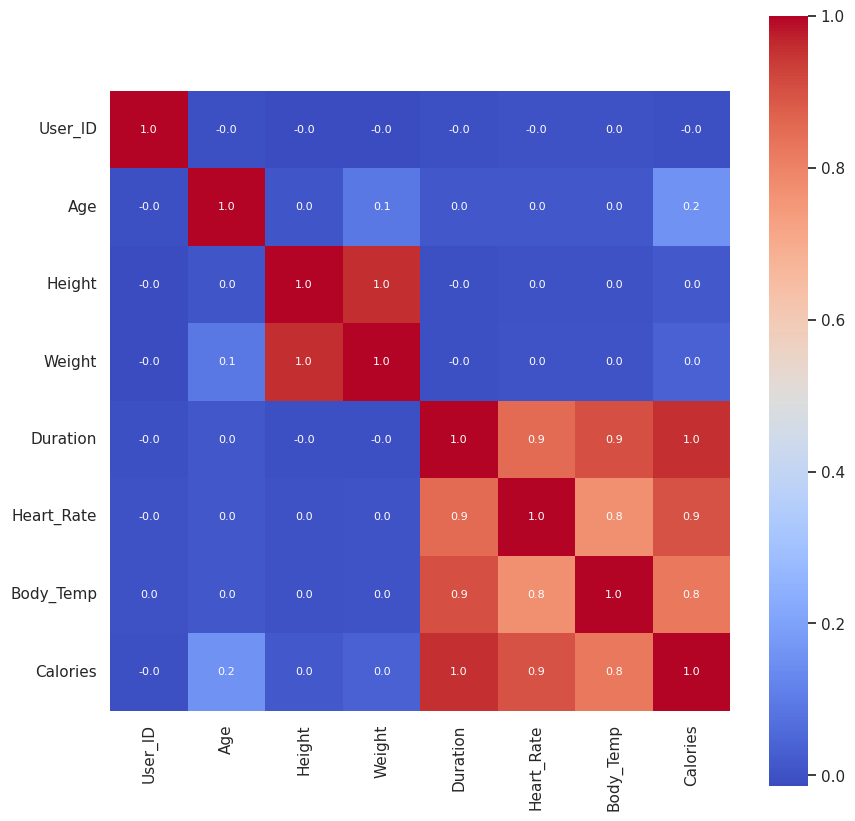

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 10))
sns.heatmap(correlation, cbar=True, square=True, fmt='.1f', annot=True, annot_kws={'size': 8}, cmap='coolwarm')
plt.show()

In [ ]:
calories_data.replace({"Gender":{'male':0,'female':1}}, inplace=True)

<ipython-input-46-58112ca46fc1>:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  calories_data.replace({"Gender":{'male':0,'female':1}}, inplace=True)


In [ ]:
calories_data.head()

,User_ID,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
0,14733363,0,68,190.0,94.0,29.0,105.0,40.8,231.0
1,14861698,1,20,166.0,60.0,14.0,94.0,40.3,66.0
2,11179863,0,69,179.0,79.0,5.0,88.0,38.7,26.0
3,16180408,1,34,179.0,71.0,13.0,100.0,40.5,71.0
4,17771927,1,27,154.0,58.0,10.0,81.0,39.8,35.0


In [ ]:
X = calories_data.drop(columns=['User_ID','Calories'], axis=1)
Y = calories_data['Calories']

In [ ]:
print(X)

       Gender  Age  Height  Weight  Duration  Heart_Rate  Body_Temp
0           0   68   190.0    94.0      29.0       105.0       40.8
1           1   20   166.0    60.0      14.0        94.0       40.3
2           0   69   179.0    79.0       5.0        88.0       38.7
3           1   34   179.0    71.0      13.0       100.0       40.5
4           1   27   154.0    58.0      10.0        81.0       39.8
...       ...  ...     ...     ...       ...         ...        ...
14995       1   20   193.0    86.0      11.0        92.0       40.4
14996       1   27   165.0    65.0       6.0        85.0       39.2
14997       1   43   159.0    58.0      16.0        90.0       40.1
14998       0   78   193.0    97.0       2.0        84.0       38.3
14999       0   63   173.0    79.0      18.0        92.0       40.5

[15000 rows x 7 columns]


In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.5, random_state=4)

In [ ]:
print(X.shape, X_train.shape, X_test.shape)

(15000, 7) (7500, 7) (7500, 7)


In [ ]:
model = XGBRegressor()

In [ ]:
model.fit(X_train, Y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [ ]:
test_data_prediction = model.predict(X_test)

In [ ]:
print(test_data_prediction)

[105.300865  76.81124  148.61     ...  82.30036   31.870443  61.551765]


In [ ]:
mae = metrics.mean_absolute_error(Y_test, test_data_prediction)

In [ ]:
print("Mean Absolute Error = ", mae)

Mean Absolute Error =  1.6741904508471488


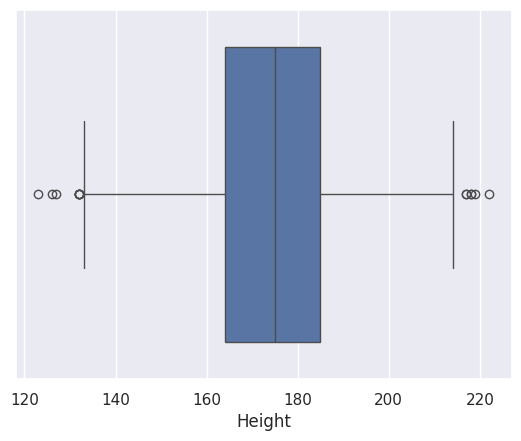

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

#Example for 'Height' column
sns.boxplot(x=calories_data['Height'])
plt.show()

# Winsorizing example:  Cap values at the 1st and 99th percentiles
Q1 = calories_data['Height'].quantile(0.01)
Q3 = calories_data['Height'].quantile(0.99)
calories_data['Height'] = calories_data['Height'].clip(Q1, Q3)

#OR you can calculate IQR method to remove outlier
Q1 = calories_data['Height'].quantile(0.25)
Q3 = calories_data['Height'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
calories_data = calories_data[(calories_data['Height'] >= lower_bound) & (calories_data['Height'] <= upper_bound)]

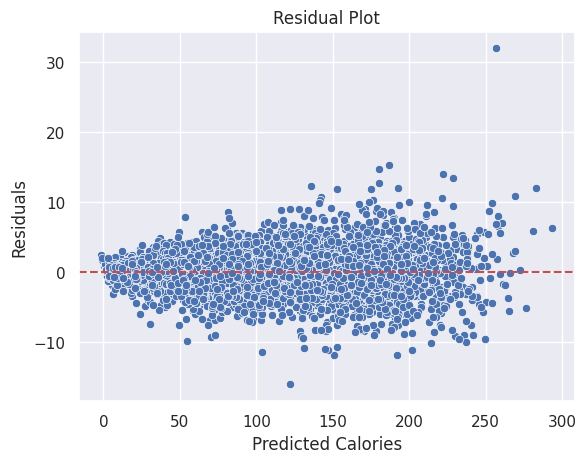

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

residuals = Y_test - test_data_prediction
sns.scatterplot(x=test_data_prediction, y=residuals)
plt.xlabel("Predicted Calories")
plt.ylabel("Residuals")
plt.title("Residual Plot")
plt.axhline(y=0, color='r', linestyle='--')  # Add a horizontal line at y=0
plt.show()

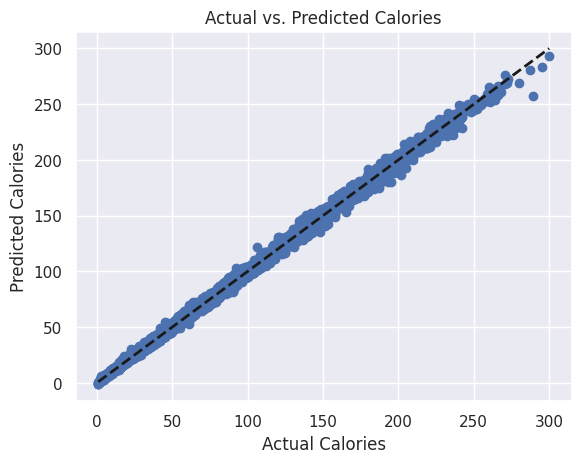

In [ ]:
import matplotlib.pyplot as plt

plt.scatter(Y_test, test_data_prediction)
plt.xlabel("Actual Calories")
plt.ylabel("Predicted Calories")
plt.title("Actual vs. Predicted Calories")
plt.plot([Y_test.min(), Y_test.max()], [Y_test.min(), Y_test.max()], 'k--', lw=2)  # Add a diagonal line
plt.show()